# EDA

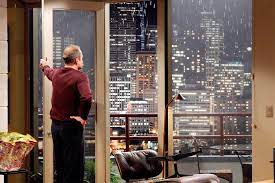

In [2]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Read the data from the data set. My data set is from data_Houses.csv

In [827]:
df=pd.read_csv('data/data_Houses.csv')
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,400.000,1951,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,0.000,1933,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,910.000,1965,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,1987,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000


In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

Plot color coded zipcodes to identify those which belong to the central are in Seattle

In [828]:
import plotly.express as px
df.zipcode=df.zipcode.apply(lambda x: str(x))

fig=px.scatter_mapbox(df, lat=df.lat, lon=df.long, hover_name='zipcode', color='zipcode',size='price',
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

Created a subset of the data frame with chosen subset of zipcodes:
Display only those over the Seattle map

In [955]:
df1=df[df.zipcode.isin(['98122','98112','98126','98109','98116','98118','98103','98199','98105','98119','98144','98106','98108','98102','98107','98136'])]
fig=px.scatter_mapbox(df1, lat=df1.lat, lon=df1.long, hover_name='zipcode', color='zipcode',
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

What builds the price of a house in central Seattle?


In [830]:
corr_columns=["sqft_living", "sqft_lot", "bedrooms","bathrooms","grade", "price","view","sqft_above","sqft_basement"]
corr_mtrx=df1[corr_columns].corr()
corr_mtrx

,sqft_living,sqft_lot,bedrooms,bathrooms,grade,price,view,sqft_above,sqft_basement
sqft_living,1.000,0.353,0.580,0.671,0.659,0.779,0.341,0.870,0.676
sqft_lot,0.353,1.000,0.189,0.014,0.071,0.346,0.271,0.314,0.230
bedrooms,0.580,0.189,1.000,0.466,0.283,0.350,0.100,0.515,0.375
bathrooms,0.671,0.014,0.466,1.000,0.612,0.508,0.201,0.612,0.410
grade,0.659,0.071,0.283,0.612,1.000,0.697,0.300,0.683,0.283
price,0.779,0.346,0.350,0.508,0.697,1.000,0.391,0.752,0.417
view,0.341,0.271,0.100,0.201,0.300,0.391,1.000,0.286,0.248
sqft_above,0.870,0.314,0.515,0.612,0.683,0.752,0.286,1.000,0.225
sqft_basement,0.676,0.230,0.375,0.410,0.283,0.417,0.248,0.225,1.000


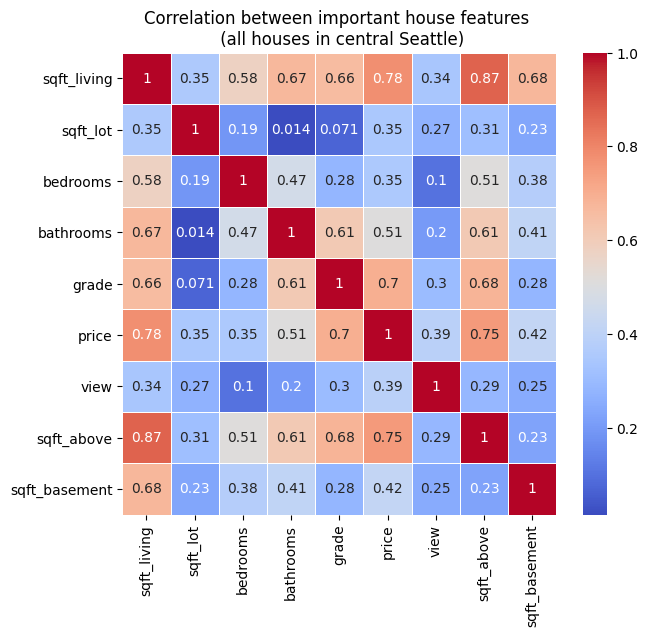

In [892]:
plt.figure(figsize = (7,6))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')
ax.set_title('Correlation between important house features \n (all houses in central Seattle)');

Find out what are the conditions for the houses in these data set?
Were the houses renovated?

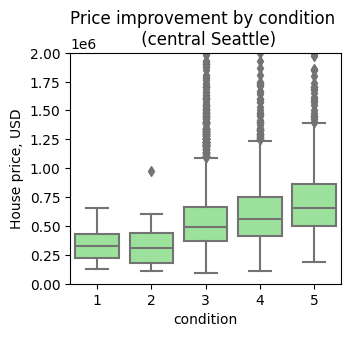

In [890]:
plt.figure(figsize = (3.5,3))
ax=sns.boxplot(data=df1, x='condition', y='price', color='lightgreen')
plt.ylim(0, 2000000)
ax.set(ylabel='House price, USD')
ax.set_title('Price improvement by condition \n (central Seattle)');


In [833]:
df1['renovated']=df1.yr_renovated.fillna(1)
df1.renovated[df1['renovated']>1]=2

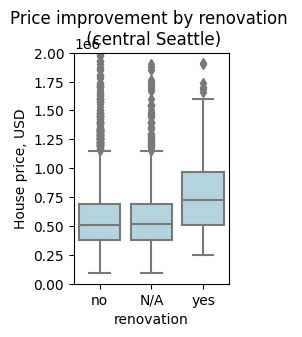

In [889]:
plt.figure(figsize = (2,3))
ax=sns.boxplot(data=df1, x='renovated', y='price', color='lightblue')
plt.ylim(0, 2000000)
ax.set(ylabel='House price, USD', xlabel='renovation')
ax.set_title('Price improvement by renovation \n (central Seattle)');
ax.set_xticklabels(labels=["no", "N/A","yes"]);


Are good conditions of the houses correspond to the renovation status

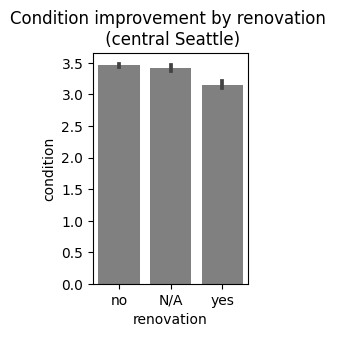

In [899]:
plt.figure(figsize = (2,3))
df2=df1[df1.renovated.isin([0,2])]
ax=sns.barplot(data=df1, x='renovated', y='condition', color='grey')
ax.set(ylabel='condition', xlabel='renovation')
ax.set_title('Condition improvement by renovation \n (central Seattle)');
ax.set_xticklabels(labels=["no", "N/A","yes"]);

Lets have look on expansive houses

In [836]:
df1['yr_sold']=df['date'].apply(lambda x: int(x.split('-')[0]))
df1['mo_sold']=df['date'].apply(lambda x: int(x.split('-')[1]))
df1['day_sold']=df['date'].apply(lambda x: int(x.split('-')[2]))
df1.mo_sold[df1.yr_sold==2015]=df1.mo_sold[df1.yr_sold==2015]+12
df1.yr_renovated=df1.yr_renovated/10



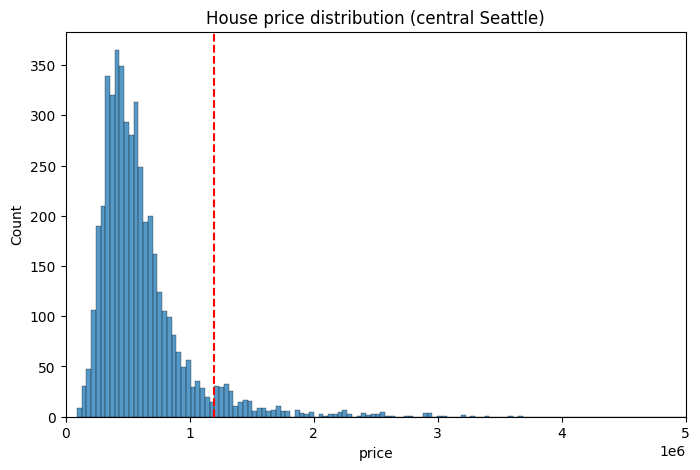

In [909]:
ax=sns.histplot(data=df1, x='price')
plt.xlim(0,5000000)
ax.set_title('House price distribution (central Seattle)');
plt.axvline(1200000, 0,350, color='red', ls='--')

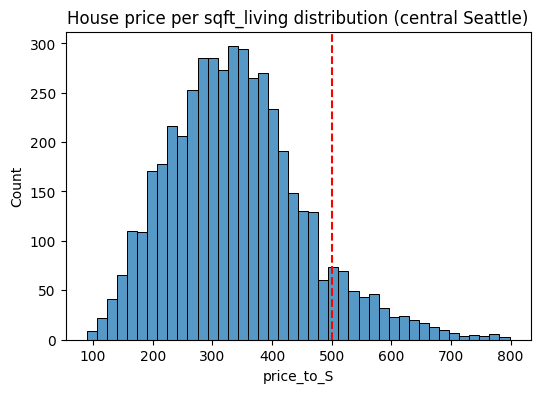

In [915]:
df1['price_to_S']=df1.price/(df1.sqft_living)
#g = sns.FacetGrid(df1, col="renovated", col_wrap=3)
#g.map_dataframe(sns.histplot,  x="price_to_S")
#g.add_legend()
plt.figure(figsize = (6,4))
ax=sns.histplot(data=df1, x='price_to_S')
ax.set_title('House price per sqft_living distribution (central Seattle)');
plt.axvline(500, 0,350, color='red', ls='--')

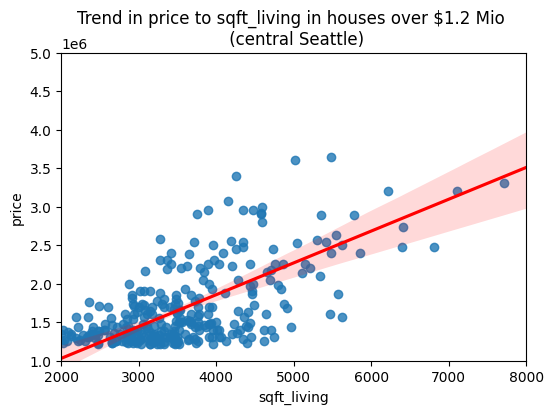

In [914]:
plt.figure(figsize = (6,4))
df2=df1[df1.price>1200000]
ax=sns.regplot(data=df2, x='sqft_living', y='price', line_kws={'color':'red'})
plt.xlim(2000,8000)
plt.ylim(1000000,5000000)
ax.set_title('Trend in price to sqft_living in houses over $1.2 Mio \n (central Seattle)');

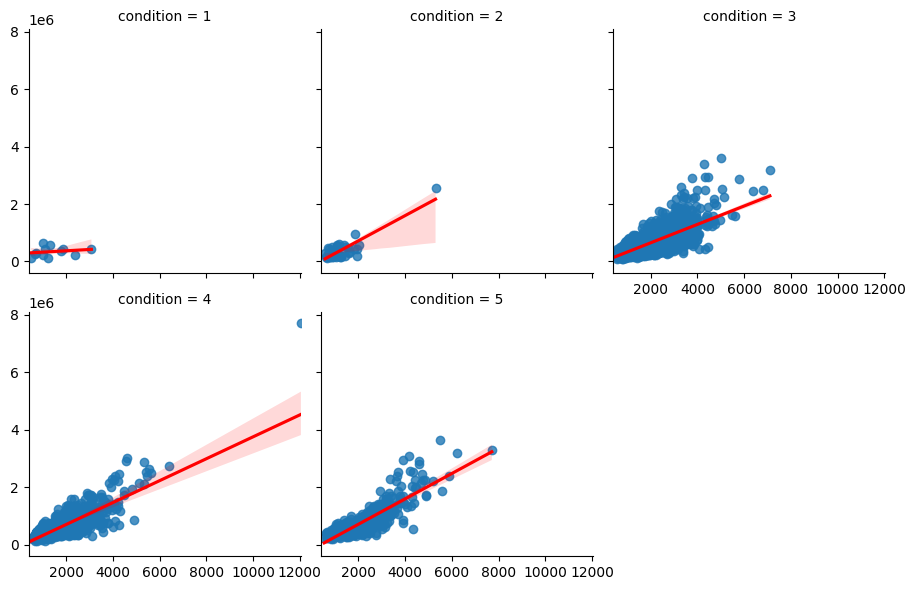

In [839]:
g = sns.FacetGrid(df1, col="condition", col_wrap=3)
g.map_dataframe(sns.regplot, x='sqft_living', y='price', line_kws={'color':'red'})
g.add_legend()

In [840]:
df1[df1.renovated==2].value_counts('condition')

condition
3    239
4     24
5     10
1      1
dtype: int64

In [917]:
df2=df1[(df1.price>1000000 ) | (df1.price_to_S>500)]


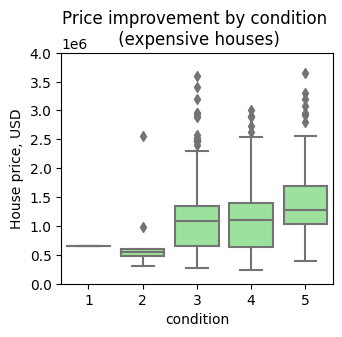

In [921]:
plt.figure(figsize = (3.5,3))
ax=sns.boxplot(data=df2, x='condition', y='price',color='lightgreen')
plt.ylim(0, 4000000)
ax.set(ylabel='House price, USD')
ax.set_title('Price improvement by condition \n (expensive houses)');


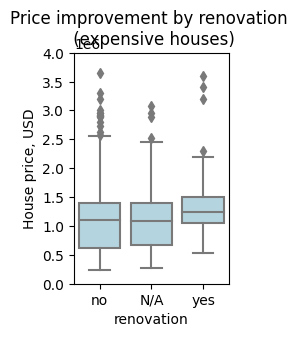

In [924]:
plt.figure(figsize = (2,3))
ax=sns.boxplot(data=df2, x='renovated', y='price', color='lightblue')
plt.ylim(0, 4000000)
ax.set(ylabel='House price, USD', xlabel='renovation')
ax.set_title('Price improvement by renovation \n (expensive houses)');
ax.set_xticklabels(labels=["no", "N/A","yes"]);


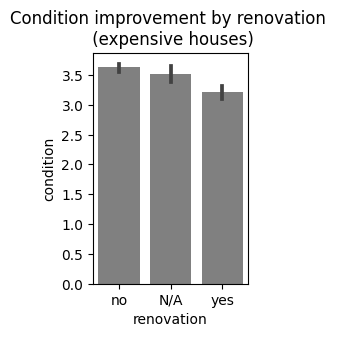

In [927]:
plt.figure(figsize = (2,3))
ax=sns.barplot(data=df2, x='renovated', y='condition', color='grey')
ax.set(ylabel='condition', xlabel='renovation')
ax.set_title('Condition improvement by renovation \n (expensive houses)');
ax.set_xticklabels(labels=["no", "N/A","yes"]);

how many expensive houses in which condition

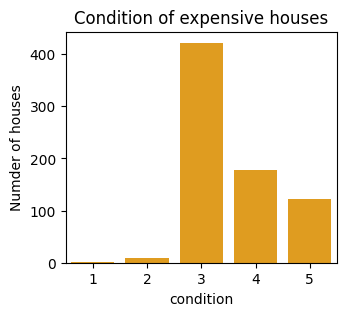

In [938]:
plt.figure(figsize = (3.5,3))
df4=df2.groupby('condition').count()
ax=sns.barplot(x=df4.index.tolist(), y=df4.id, color='orange')
ax.set(ylabel='Numder of houses', xlabel='condition')
ax.set_title('Condition of expensive houses');


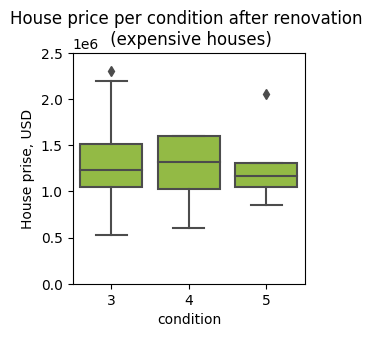

In [958]:
plt.figure(figsize = (3,3))
ax=sns.boxplot(data=df2[df2.renovated==2], x='condition', y='price', color='yellowgreen')
plt.ylim(0, 2500000)
ax.set(ylabel='House prise, USD', xlabel='condition')
ax.set_title('House price per condition after renovation \n (expensive houses)');

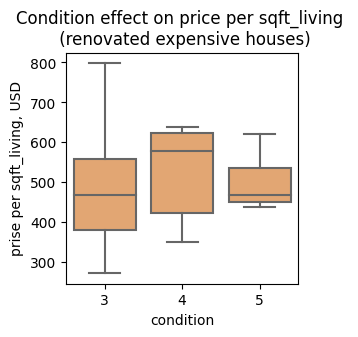

In [957]:
plt.figure(figsize = (3,3))
ax=sns.boxplot(data=df2[df2.renovated==2], x='condition', y='price_to_S', color='sandybrown')
#plt.ylim(0, 2500000)
ax.set(ylabel='prise per sqft_living, USD', xlabel='condition')
ax.set_title('Condition effect on price per sqft_living \n (renovated expensive houses)');

Are the yearly sales rates the same between tho years for expansive houses

In [802]:
df3.value_counts('mo_sold')

mo_sold
28    513
7     476
6     473
10    448
5     404
27    390
9     384
8     380
12    315
11    313
26    240
25    196
29    156
dtype: int64

In [856]:
#df3=df1[df1.yr_sold==2015]
df3=df2


[Text(0, 0.5, 'Number of houses sold')]

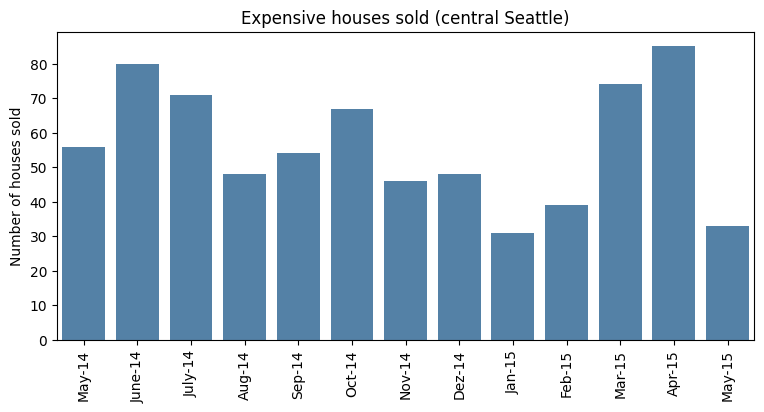

In [857]:
#df3=df2[df2.yr_sold==2014]
#df3.mo_sold[df3.yr_sold==2015]=df3.mo_sold[df3.yr_sold==2015]+12
plt.figure(figsize = (9,4))

ax=sns.barplot(x=df3.value_counts('mo_sold').index.tolist(), y=df3.value_counts('mo_sold').values.tolist(),color='steelblue')
ax.set_xticklabels(['May-14','June-14','July-14','Aug-14','Sep-14','Oct-14','Nov-14','Dez-14','Jan-15','Feb-15','Mar-15','Apr-15','May-15'], rotation='90');
ax.set_title('Expensive houses sold (central Seattle)')
ax.set(ylabel='Number of houses sold')

What is the average house selling price per month  

[Text(0, 0.5, 'House price'), Text(0.5, 0, '')]

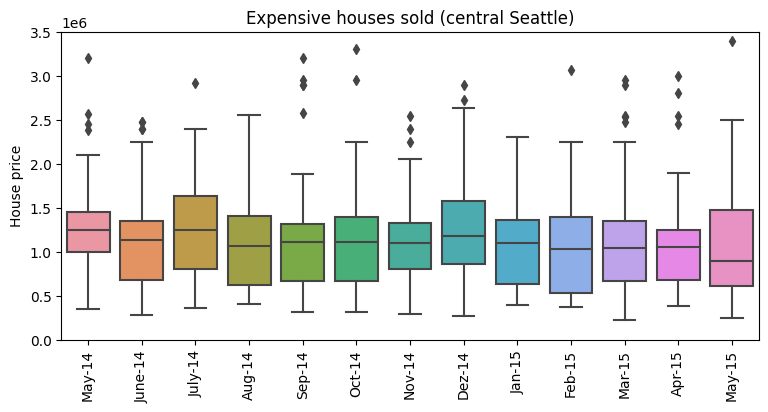

In [869]:
plt.figure(figsize = (9,4))
ax=sns.boxplot(data=df2, x='mo_sold', y='price')
plt.ylim(0, 3500000)
ax.set_xticklabels(['May-14','June-14','July-14','Aug-14','Sep-14','Oct-14','Nov-14','Dez-14','Jan-15','Feb-15','Mar-15','Apr-15','May-15'], rotation='90');
ax.set_title('Expensive houses sold (central Seattle)')
ax.set(ylabel='House price', xlabel='')

In [852]:
df1

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,renovated,yr_sold,mo_sold,day_sold,price_to_S
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,-122.393,1360.000,5000.000,2014-12-09,604000.000,0.000,2014,12,9,308.163
14,1175000570,5.000,2.000,1810.000,4850.000,1.500,0.000,0.000,3,7,...,-122.394,1360.000,4850.000,2015-03-12,530000.000,0.000,2015,15,12,292.818
15,9297300055,4.000,3.000,2950.000,5000.000,2.000,0.000,3.000,3,9,...,-122.375,2140.000,4000.000,2015-01-24,650000.000,0.000,2015,13,24,220.339
17,6865200140,4.000,1.000,1600.000,4300.000,1.500,0.000,0.000,4,7,...,-122.343,1610.000,4300.000,2014-05-29,485000.000,0.000,2014,5,29,303.125
26,1794500383,3.000,1.750,2450.000,2691.000,2.000,0.000,0.000,3,8,...,-122.360,1760.000,3573.000,2014-06-26,937000.000,1.000,2014,6,26,382.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21590,7936000429,4.000,3.500,3510.000,7200.000,2.000,0.000,0.000,3,9,...,-122.398,2050.000,6200.000,2015-03-26,1010000.000,0.000,2015,15,26,287.749
21591,2997800021,3.000,2.500,1310.000,1294.000,2.000,0.000,0.000,3,8,...,-122.409,1330.000,1265.000,2015-02-19,475000.000,0.000,2015,14,19,362.595
21592,263000018,3.000,2.500,1530.000,1131.000,3.000,0.000,0.000,3,8,...,-122.346,1530.000,1509.000,2014-05-21,360000.000,0.000,2014,5,21,235.294
21594,1523300141,2.000,0.750,1020.000,1350.000,2.000,0.000,0.000,3,7,...,-122.299,1020.000,2007.000,2014-06-23,402101.000,0.000,2014,6,23,394.217


In [984]:
max(df1.value_counts('id'))
df4=df1.groupby('id').count().reset_index()
df5=df1[df1.id.isin(df4[df4.date>1].id.tolist())]


In [985]:
df5['date'] = pd.to_datetime(df5['date'], format='%Y/%m/%d')

In [987]:

i=1
k=0
ddd=(df5.price*0).tolist()
ppp=(df5.price*0).tolist()
while i<56:
     
     ddd[i]=(df5.date.iloc[i]-df5.date.iloc[i-1]).days
     ppp[i]=(df5.price.iloc[i]-df5.price.iloc[i-1])/df5.price.iloc[i-1]*100
     i+=2

In [990]:
df5['day_diff']=ddd
df5['price_diff100%']=ppp


[Text(0, 0.5, 'House price'), Text(0.5, 0, '')]

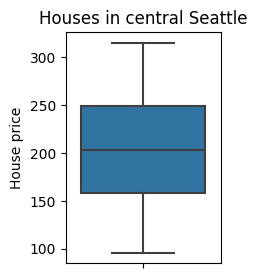

In [1043]:
plt.figure(figsize = (2,3))
ax=sns.boxplot(data=df5[df5.day_diff>0],y='day_diff')
ax.set_title('Houses in central Seattle')
ax.set(ylabel='House price', xlabel='')

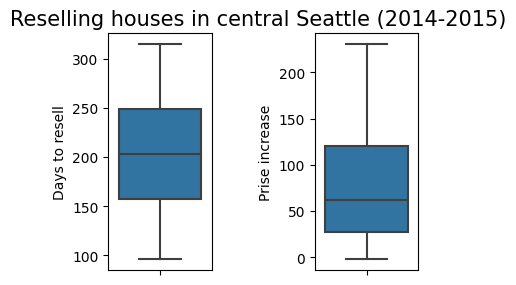

In [1065]:
fig, axes = plt.subplots(1,2, figsize=(4,3))  # create subplots on 2 rows and 3 columns
plt.suptitle('Reselling houses in central Seattle (2014-2015)', fontsize=15)

sns.boxplot(ax=axes[0], data=df5[df5.day_diff>0], y='day_diff')
sns.boxplot(ax=axes[1], data=df5[df5.day_diff>0], y='price_diff100%')

plt.subplots_adjust(hspace = .5, wspace = 1, top = .9)
axes[0].set_ylabel("Days to resell"); 
axes[1].set_ylabel("Prise increase"); 


<AxesSubplot:xlabel='sqft_living', ylabel='price'>

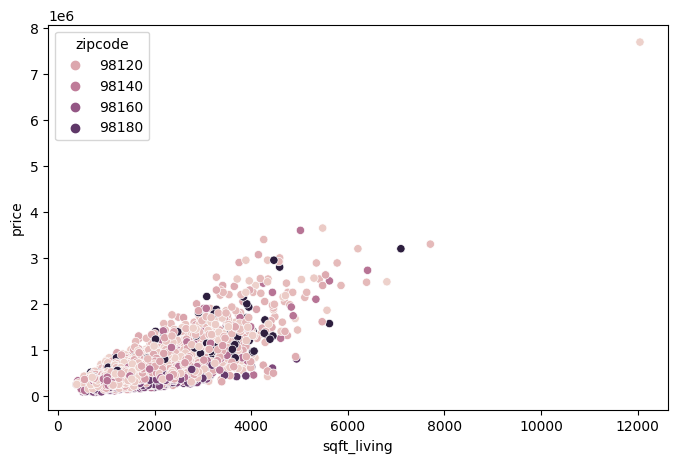

In [453]:
df.columns
df.describe()
df1.duplicated('id').value_counts()
sns.scatterplot(data=df1, x= df1.sqft_living, y= df1.price, hue="zipcode")


In [ ]:
#plt.savefig('Images/2_price.png')
#fig.write_image("Images/4_Price.png")

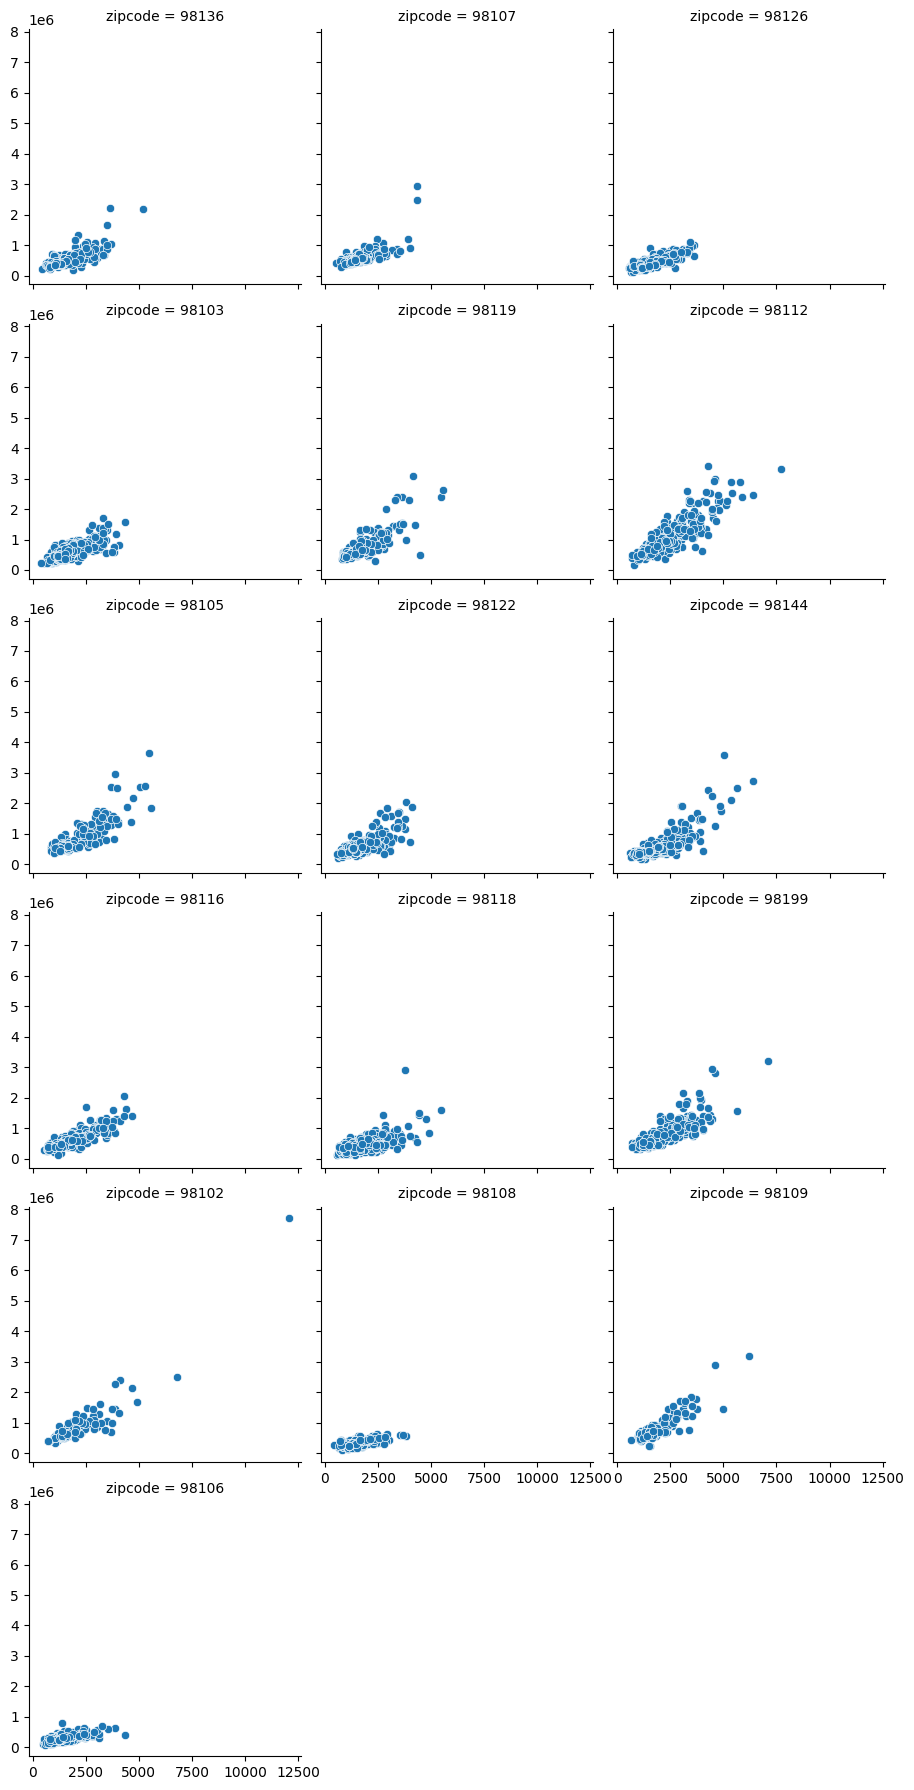

In [548]:
g = sns.FacetGrid(df1, col="zipcode", col_wrap=3)
g.map_dataframe(sns.scatterplot, x="sqft_living", y="price")
g.add_legend()

In [561]:
df1[df.yr_renovated == 0].count()

id               3565
bedrooms         3565
bathrooms        3565
sqft_living      3565
sqft_lot         3565
floors           3565
waterfront       3181
view             3555
condition        3565
grade            3565
sqft_above       3565
sqft_basement    3487
yr_built         3565
yr_renovated     3565
zipcode          3565
lat              3565
long             3565
sqft_living15    3565
sqft_lot15       3565
date             3565
price            3565
dtype: int64

In [456]:
df1['renovated']=df1.yr_renovated.fillna(1)
df1.renovated[df1['renovated']>1]=2


In [457]:
df1.head(10)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,renovated
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,1955,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,0.000
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,1960,0.000,98146,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000,0.000
14,1175000570,5.000,2.000,1810.000,4850.000,1.500,0.000,0.000,3,7,...,1900,0.000,98107,47.670,-122.394,1360.000,4850.000,2015-03-12,530000.000,0.000
15,9297300055,4.000,3.000,2950.000,5000.000,2.000,0.000,3.000,3,9,...,1979,0.000,98126,47.571,-122.375,2140.000,4000.000,2015-01-24,650000.000,0.000
17,6865200140,4.000,1.000,1600.000,4300.000,1.500,0.000,0.000,4,7,...,1916,0.000,98103,47.665,-122.343,1610.000,4300.000,2014-05-29,485000.000,0.000
26,1794500383,3.000,1.750,2450.000,2691.000,2.000,0.000,0.000,3,8,...,1915,NaN,98119,47.639,-122.360,1760.000,3573.000,2014-06-26,937000.000,1.000
27,3303700376,3.000,1.000,1400.000,1581.000,1.500,0.000,0.000,5,8,...,1909,0.000,98112,47.622,-122.314,1860.000,3861.000,2014-12-01,667000.000,0.000
37,2768000400,4.000,2.000,2360.000,6000.000,2.000,0.000,0.000,4,8,...,1904,0.000,98107,47.670,-122.362,1730.000,4700.000,2014-12-30,640000.000,0.000
43,9270200160,3.000,1.000,1570.000,2280.000,2.000,0.000,0.000,3,7,...,1922,0.000,98119,47.641,-122.364,1580.000,2640.000,2014-10-28,685000.000,0.000
54,4217401195,5.000,2.250,2730.000,6000.000,1.500,0.000,0.000,3,8,...,1927,0.000,98105,47.657,-122.281,2730.000,6000.000,2015-03-03,920000.000,0.000


In [592]:
fig=px.scatter_mapbox(df2, lat=df2.lat, lon=df2.long, hover_name='zipcode', color='grade',size='price',
                        size_max=15, 
                        zoom=8, 
                        width=900, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.show()

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

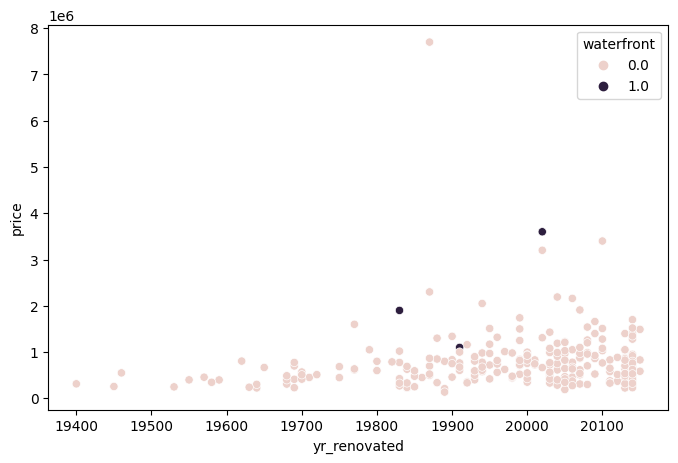

In [459]:

sns.scatterplot(data=df1[df1.yr_renovated>1], x= df1.yr_renovated, y= df1.price, hue="waterfront")

In [460]:
df1['yr_sold']=df['date'].apply(lambda x: x.split('-')[0])
df1['mo_sold']=df['date'].apply(lambda x: x.split('-')[1])
df1['day_sold']=df['date'].apply(lambda x: x.split('-')[2])


In [461]:
df1.yr_renovated=df1.yr_renovated/10


In [462]:
df1.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,renovated,yr_sold,mo_sold,day_sold
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,0.000,2014,10,13
8,2414600126,3.000,1.000,1780.000,7470.000,1.000,0.000,0.000,3,7,...,47.512,-122.337,1780.000,8113.000,2015-04-15,229500.000,0.000,2015,04,15
14,1175000570,5.000,2.000,1810.000,4850.000,1.500,0.000,0.000,3,7,...,47.670,-122.394,1360.000,4850.000,2015-03-12,530000.000,0.000,2015,03,12
15,9297300055,4.000,3.000,2950.000,5000.000,2.000,0.000,3.000,3,9,...,47.571,-122.375,2140.000,4000.000,2015-01-24,650000.000,0.000,2015,01,24
17,6865200140,4.000,1.000,1600.000,4300.000,1.500,0.000,0.000,4,7,...,47.665,-122.343,1610.000,4300.000,2014-05-29,485000.000,0.000,2014,05,29


In [463]:
corr_columns=["sqft_living15", "sqft_lot15", "floors", "condition", "price", "renovated","yr_sold","yr_built"]
corr_mtrx=df2[corr_columns].corr()
corr_mtrx

,sqft_living15,sqft_lot15,floors,condition,price,renovated,yr_built
sqft_living15,1.000,0.671,0.019,0.099,0.670,0.040,0.045
sqft_lot15,0.671,1.000,-0.183,0.115,0.532,0.057,0.078
floors,0.019,-0.183,1.000,-0.233,0.171,0.010,0.425
condition,0.099,0.115,-0.233,1.000,0.056,-0.142,-0.356
price,0.670,0.532,0.171,0.056,1.000,0.091,0.083
renovated,0.040,0.057,0.010,-0.142,0.091,1.000,-0.145
yr_built,0.045,0.078,0.425,-0.356,0.083,-0.145,1.000


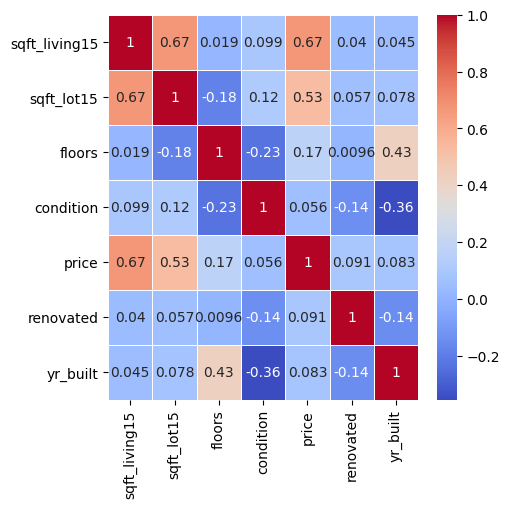

In [464]:
plt.figure(figsize = (5,5))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

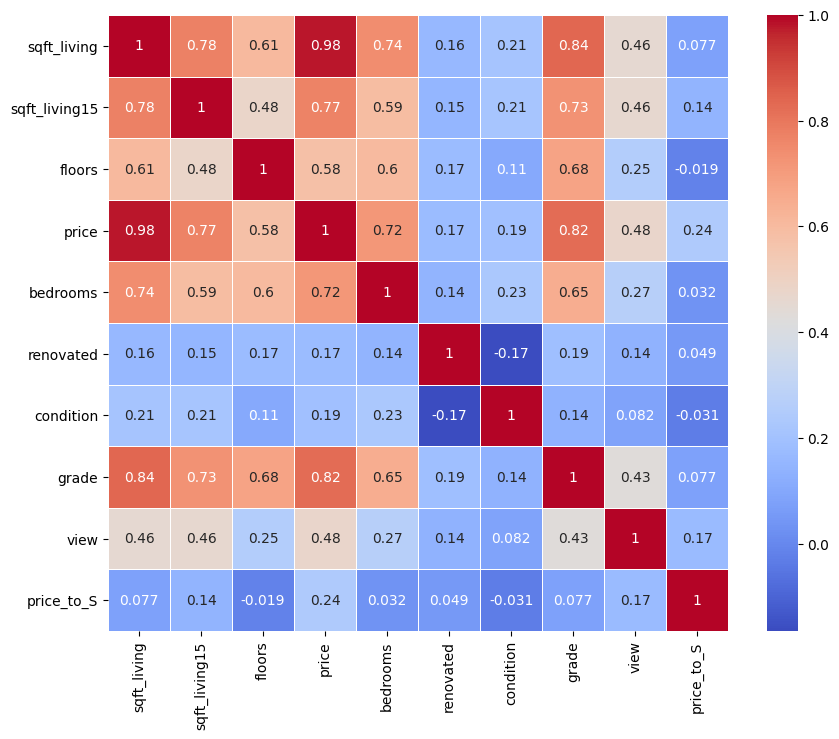

In [526]:
#[98122,98112,98126,98146,98109,98040,98116,98118,98178,98039,98103,98199,98105,98119,98144,98106,98108,98102,98178,98107,98168]
corr_columns=["sqft_living","sqft_living15","floors", "price", "bedrooms","renovated","condition","grade","view","price_to_S"]
df2=df1[df1.price_to_S>500]
corr_mtrx=df2[corr_columns].corr()
corr_mtrx
plt.figure(figsize = (10,8))
ax = sns.heatmap(corr_mtrx, linewidths=.5, annot=True, cmap='coolwarm')

<AxesSubplot:xlabel='floors', ylabel='Count'>

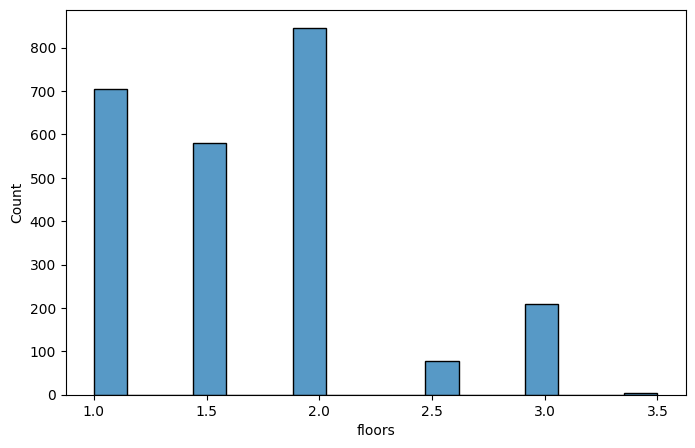

In [469]:
sns.histplot(df2.floors)

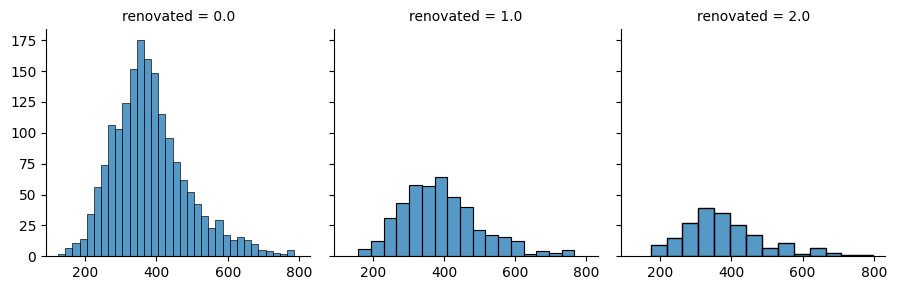

In [515]:
df1['price_to_S']=df1.price/(df1.sqft_living)
g = sns.FacetGrid(df2, col="renovated", col_wrap=3)
g.map_dataframe(sns.histplot,  x="price_to_S")
g.add_legend()


(0.0, 2000000.0)

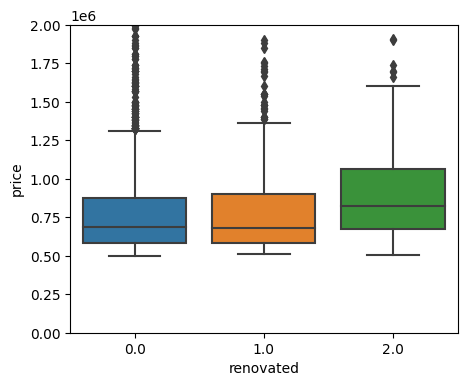

In [513]:
plt.figure(figsize = (5,4))
sns.boxplot(data=df2, x='renovated', y='price')
plt.ylim(0, 2000000)


<AxesSubplot:xlabel='mo_sold', ylabel='Count'>

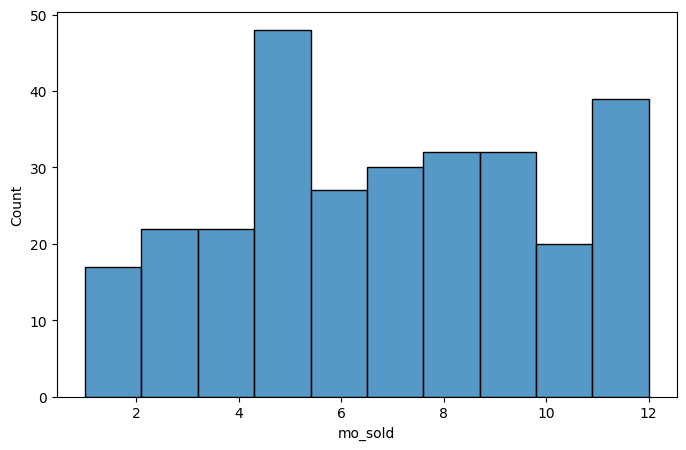

In [522]:
#is it likely that older houses were renovated?
df3=df1[df1.renovated==2]
df3.mo_sold=df3.mo_sold.apply(lambda x: int(x))
sns.histplot(df3.mo_sold, bins=10)

<AxesSubplot:xlabel='mo_sold', ylabel='price'>

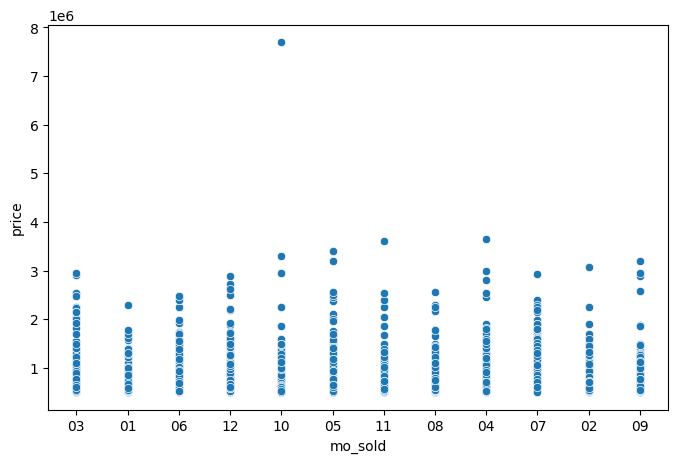

In [473]:
#does the month of selling correlates with the price
sns.scatterplot(data=df2,x='mo_sold', y='price')

<AxesSubplot:xlabel='price', ylabel='Count'>

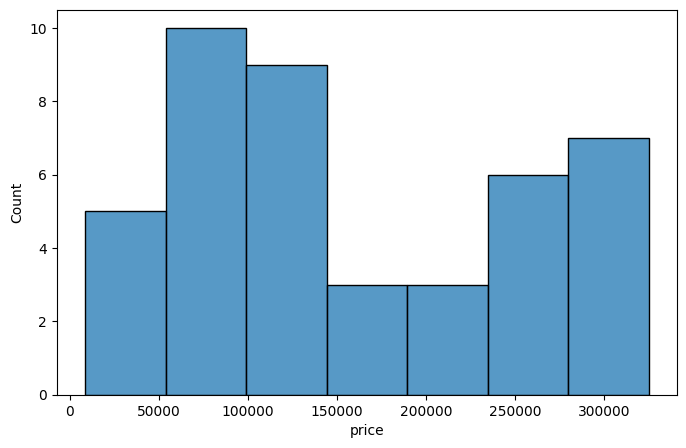

In [474]:
#are there any houses that were sold more than one time
df3=df1[df1.id.isin(df1.id.value_counts()[df1.id.value_counts()>1].index.tolist())]
sns.histplot(df3.groupby('id').max('date')['price']-df3.groupby('id').min('date')['price'])

In [475]:
df3['renovated']

324     2.000
325     2.000
345     1.000
346     1.000
1084    0.000
         ... 
18691   0.000
18747   0.000
18748   0.000
20596   0.000
20597   0.000
Name: renovated, Length: 87, dtype: float64

In [966]:
len((df2.id.value_counts()>2).index.tolist())
#f1.id.value_counts()[df1.id.value_counts()>2].index.tolist()

732

In [477]:
df3['date'] = pd.to_datetime(df3['date'], format='%Y/%m/%d')

In [478]:
(df3.date.iloc[86]-df3.date.iloc[85]).days

121

In [486]:
df3

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,long,sqft_living15,sqft_lot15,date,price,renovated,yr_sold,mo_sold,day_sold,price_to_S
324,7520000520,2.000,1.000,1240.000,12092.000,1.000,0.000,0.000,3,6,...,-122.352,1820.000,7460.000,2014-09-05,232000.000,2.000,2014,09,05,187.097
325,7520000520,2.000,1.000,1240.000,12092.000,1.000,0.000,0.000,3,6,...,-122.352,1820.000,7460.000,2015-03-11,240500.000,2.000,2015,03,11,193.952
345,3969300030,4.000,1.000,1000.000,7134.000,1.000,0.000,0.000,3,6,...,-122.240,1020.000,7138.000,2014-07-23,165000.000,1.000,2014,07,23,165.000
346,3969300030,4.000,1.000,1000.000,7134.000,1.000,0.000,0.000,3,6,...,-122.240,1020.000,7138.000,2014-12-29,239900.000,1.000,2014,12,29,239.900
1084,9834200885,4.000,2.500,2080.000,4080.000,1.000,0.000,0.000,5,7,...,-122.290,1340.000,4080.000,2014-07-17,360000.000,0.000,2014,07,17,173.077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18691,8121100395,4.000,1.500,1600.000,6180.000,1.500,0.000,0.000,3,6,...,-122.285,1410.000,6180.000,2015-03-11,645000.000,0.000,2015,03,11,403.125
18747,3332000615,3.000,1.000,1330.000,3740.000,1.500,NaN,0.000,3,6,...,-122.274,1330.000,5053.000,2014-10-20,310000.000,0.000,2014,10,20,233.083
18748,3332000615,3.000,1.000,1330.000,3740.000,1.500,NaN,0.000,3,6,...,-122.274,1330.000,5053.000,2015-04-22,389000.000,0.000,2015,04,22,292.481
20596,2724049222,2.000,2.500,1000.000,1092.000,2.000,NaN,0.000,3,7,...,-122.271,1330.000,1466.000,2014-08-02,163800.000,0.000,2014,08,02,163.800


In [479]:
df4=df3[df3.id!=795000620]

In [487]:
df4
i=1
k=0
ddd=(df4.price*0).tolist()
ppp=(df4.price*0).tolist()
while i<84:
     
     ddd[i]=(df4.date.iloc[i]-df4.date.iloc[i-1]).days
     ppp[i]=(df4.price.iloc[i]-df4.price.iloc[i-1])/df4.price.iloc[i-1]
     i+=2

In [518]:
df4['day_diff']=ddd
df4['price_diff100%']=ppp


In [520]:
df4

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,price,renovated,yr_sold,mo_sold,day_sold,price_to_S,day_diff,price_diff,price_diff%,price_diff100%
324,7520000520,2.000,1.000,1240.000,12092.000,1.000,0.000,0.000,3,6,...,232000.000,2.000,2014,09,05,187.097,0.000,0.000,0.000,0.000
325,7520000520,2.000,1.000,1240.000,12092.000,1.000,0.000,0.000,3,6,...,240500.000,2.000,2015,03,11,193.952,187.000,0.037,0.037,0.037
345,3969300030,4.000,1.000,1000.000,7134.000,1.000,0.000,0.000,3,6,...,165000.000,1.000,2014,07,23,165.000,0.000,0.000,0.000,0.000
346,3969300030,4.000,1.000,1000.000,7134.000,1.000,0.000,0.000,3,6,...,239900.000,1.000,2014,12,29,239.900,159.000,0.454,0.454,0.454
1084,9834200885,4.000,2.500,2080.000,4080.000,1.000,0.000,0.000,5,7,...,360000.000,0.000,2014,07,17,173.077,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18691,8121100395,4.000,1.500,1600.000,6180.000,1.500,0.000,0.000,3,6,...,645000.000,0.000,2015,03,11,403.125,260.000,0.518,0.518,0.518
18747,3332000615,3.000,1.000,1330.000,3740.000,1.500,NaN,0.000,3,6,...,310000.000,0.000,2014,10,20,233.083,0.000,0.000,0.000,0.000
18748,3332000615,3.000,1.000,1330.000,3740.000,1.500,NaN,0.000,3,6,...,389000.000,0.000,2015,04,22,292.481,184.000,0.255,0.255,0.255
20596,2724049222,2.000,2.500,1000.000,1092.000,2.000,NaN,0.000,3,7,...,163800.000,0.000,2014,08,02,163.800,0.000,0.000,0.000,0.000


<AxesSubplot:xlabel='day_diff', ylabel='price_diff100%'>

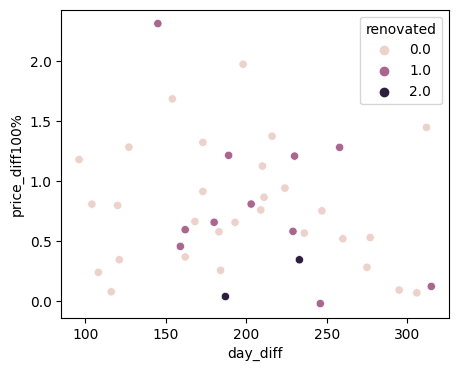

In [519]:
plt.figure(figsize = (5,4))
sns.scatterplot(data=df4[df4.day_diff>0], x='day_diff',y='price_diff100%', hue='renovated')

<AxesSubplot:ylabel='price_diff'>

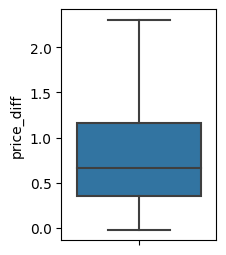

In [507]:
plt.figure(figsize = (2,3))
sns.boxplot(data=df4[df4.day_diff>0],y='price_diff')

<AxesSubplot:ylabel='day_diff'>

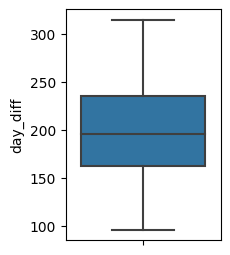

In [509]:
plt.figure(figsize = (2,3))
sns.boxplot(data=df4[df4.day_diff>0],y='day_diff')

In [ ]:
#saving figures.
fig.savefig("out.png")

In [443]:
df4.price_diff.max()
df4.price.max()

1020000.0

Choose houses from central districts in the dataset. 
Hypothesis to check:
1. Are the prices of renovated houses higher compared to non-renovated
2. Do the houses that were sold within one year fetch higher prices?
3. Were the renovated houses sold faster within a year?
4. What is the average price increase in the houses sold in one year
